## Reaktions-Diffusions-System

Bei einem [Reaktions-Diffusion-System](https://de.wikipedia.org/wiki/Reaktionsdiffusionsgleichung) kommt es zu lokalen Wechselwirkungen und einer zusätzlichen Diffussion. Reaktions-Diffusions-Systeme lassen sich durch zwei Prozesse beschreiben:

- Reaktion d.h. eine lokale Zustandsänderung 
- Diffusion d.h. eine örtliche Verbreitung

Alain Turing (1952) nutzte als erster ein Raktions-Diffusions-System um die Morphogenese von farbigen Mustern auf dem Fell von Tieren wie Zebra, Giraffe oder Kudu zu erklären.
https://de.wikipedia.org/wiki/Turing-Mechanismus

Artikel zur natürlichen Musterbildung (in engl. Sprache)
http://www.theshapeofmath.com/princeton/dynsys/pattern

### Aufgaben - Tasks
- Führen Sie alle folgenden Python Programme aus (CTRL + Enter oder Cell / Run All)
- Führen Sie das letzte Programm (# SIMULATION) mehrmals aus. Was beobachten Sie?
- Nach wievielen Ausführungen stabilisiert sich die Musterung?
- Verändern Sie die folgenden Parameter
    - a
    - b
    - tau
    - k
- Messen Sie Zeit, welches es braucht um ein 120x120 Bild zu erstellen. (Tipp: mit %time lässt sich die Zeit messen.)
- Erstellen Sie einen Katalog verschiedener Muster

In [1]:
# Bibliotheken importieren
# Source from http://ipython-books.github.io/featured-05/
#import numba
#from numba import jit

from numba import jit,float32,void
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Differentialgleichungen für zwei Variablen $u(t)$ und $v(t)$


\begin{align*}
\frac{\partial u}{\partial t} &= a \Delta u + u - u^3 - v + k\\
\tau\frac{\partial v}{\partial t} &= b \Delta v + u - v\\
\end{align*}

- u ist die Konzentration der einen Substanz
- v ist die Konzentration der anderen Substanz

Vier Konstanten werden für die Parametrisierung dieser Simulation verwendet.

In [2]:
a = 2.8e-4 #2.8e-4
b = 6e-3  #5e-3
tau = .1 #0.1
k = -.035 #-0.005


Diskeretisierung von Raum und Zeit mit der Bedingung

$$dt \leq \frac{dx^2}{2}$$

In [4]:
size = 80  # 100 size of the 2D grid
dx = 2./size  # space step

T = 2  # total time
dt = .9 * dx**2/2  # time step
n = int(T/dt)
print (n)


7111


In [6]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)


Diskreter Laplace Operator in 2D

Fünf Punkte Finite Differenzen Methode


$$\Delta u(x,y) \simeq \frac{u(x+h,y)+u(x-h,y)+u(x,y+h)+u(x,y-h)-4u(x,y)}{dx^2}$$

Ränder werden nicht berechnet

In [7]:
# Berechnung des Laplace ohne Ränder
@jit(float32[:,:](float32[:,:]),locals=dict(Ztop=float32[:,:], Zleft=float32[:,:],Zbottom=float32[:,:], Zright=float32[:,:], Zcenter=float32[:,:]),nogil=True)
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) /dx/dx



Das System wird wie folgt simuliert:

- Zu jedem Zeitschritt werden die rechten Seiten der Gleichung (ortsabhägniger Laplace) an jedem Ort berechnet.
- Als zweites werden die Variablen $u$ und $v$ angepasst, mit Hilfe einer diskreten Ableitung nach der Zeit.

In [8]:
# SIMULATION
#
# We simulate the PDE with the finite difference method.

@jit(void(),locals=dict(deltaU=float32[:,:], deltaV=float32[:,:],Uc=float32[:,:], Vc=float32[:,:]),nogil=True)
def sim():
    for i in range(n):
        # We compute the Laplacian of u and v.
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        # We take the values of u and v inside the grid.
        Uc = U[1:-1,1:-1]
        Vc = V[1:-1,1:-1]
        # We update the variables.
        U[1:-1,1:-1], V[1:-1,1:-1] = \
            Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k), \
            Vc + dt * (b * deltaV + Uc - Vc) / tau
        # Neumann conditions: derivatives at the edges
        # are null.
        
        for Z in (U, V):
            Z[0,:] = Z[1,:]
            Z[-1,:] = Z[-2,:]
            Z[:,0] = Z[:,1]
            Z[:,-1] = Z[:,-2]



CPU times: user 3.75 s, sys: 20.1 ms, total: 3.77 s
Wall time: 3.78 s
CPU times: user 2.96 s, sys: 2.67 ms, total: 2.96 s
Wall time: 2.96 s
CPU times: user 3.3 s, sys: 9 ms, total: 3.31 s
Wall time: 3.35 s
CPU times: user 2.98 s, sys: 2.19 ms, total: 2.98 s
Wall time: 2.98 s
CPU times: user 3.25 s, sys: 22.2 ms, total: 3.27 s
Wall time: 3.3 s


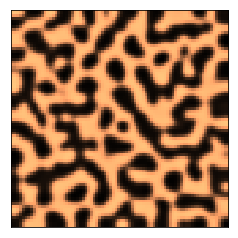

In [9]:
for i in range(5):
    %time sim()
    plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
    plt.xticks([]); plt.yticks([]);

# 2. Muster

In [10]:
#Initalisierung

a = 5.8e-4 #2.8e-4
b = 5e-3
tau = .01 #gepunktet
k = -.015


U = np.random.rand(size, size)
V = np.random.rand(size, size)

CPU times: user 2.91 s, sys: 4.36 ms, total: 2.92 s
Wall time: 2.92 s


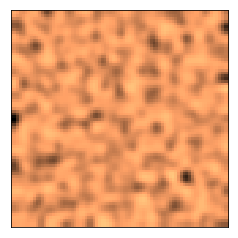

In [11]:
# 2. Berechnung
%time sim()
plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);